In [18]:
#import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [19]:
!pip install autoviz

In [20]:
#import train & test dataset(dataset collected from "https://data.gov.il/dataset/covid-19 ")
df_train = pd.read_csv("/content/drive/MyDrive/E yantra/data.csv")

In [21]:
df_train.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication
0,No,No,No,No,No,negative,Other
1,No,Yes,No,No,No,negative,Other
2,No,No,No,No,No,negative,Other
3,No,No,No,No,No,negative,Other
4,No,Yes,No,No,No,negative,Contact with confirmed


In [22]:
#print all the columns
columns = [i for i in df_train.columns]
columns

['cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'corona_result',
 'test_indication']

# Data Preprocessing

In [23]:
#print shape of dataset
df_train.shape

(2742596, 7)

In [24]:
#check for null values
df_train.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
test_indication        0
dtype: int64

# Handelling Null columns

In [25]:
df_train.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication
0,No,No,No,No,No,negative,Other
1,No,Yes,No,No,No,negative,Other
2,No,No,No,No,No,negative,Other
3,No,No,No,No,No,negative,Other
4,No,Yes,No,No,No,negative,Contact with confirmed


In [26]:
df_train['cough'].replace('Yes',1,inplace=True)
df_train['cough'].replace('No',0,inplace=True)

df_train['fever'].replace('Yes',1,inplace=True)
df_train['fever'].replace('No',0,inplace=True)

df_train['sore_throat'].replace('Yes',1,inplace=True)
df_train['sore_throat'].replace('No',0,inplace=True)

df_train['shortness_of_breath'].replace('Yes',1,inplace=True)
df_train['shortness_of_breath'].replace('No',0,inplace=True)

df_train['head_ache'].replace('Yes',1,inplace=True)
df_train['head_ache'].replace('No',0,inplace=True)

In [27]:
df_train.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
test_indication        0
dtype: int64

In [28]:
np.unique(df_train['corona_result'])

array(['negative', 'other', 'positive'], dtype=object)

In [29]:
np.unique(df_train['test_indication'])

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [30]:
#convert categorical data into numerical
df_train['corona_result'].replace('negative',0,inplace=True)
df_train['corona_result'].replace('positive',1,inplace=True)
df_train['corona_result'].replace('other',2,inplace=True)

In [31]:
df_train['test_indication'].replace('Abroad',0,inplace=True)
df_train['test_indication'].replace('Contact with confirmed',1,inplace=True)
df_train['test_indication'].replace('Other',2,inplace=True)

In [32]:
df_train.head()
k = df_train.to_csv('data.csv',index=False)

# EDA
* Here our output column is corona_result and all other columns will be used for prediction which basicalluy includes symptoms and contact with other patients

Shape of your Data Set: (2742596, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  5
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


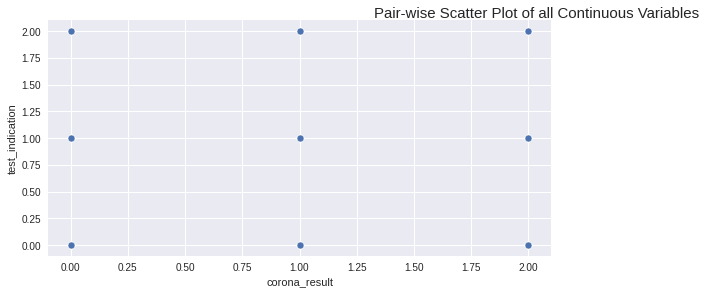

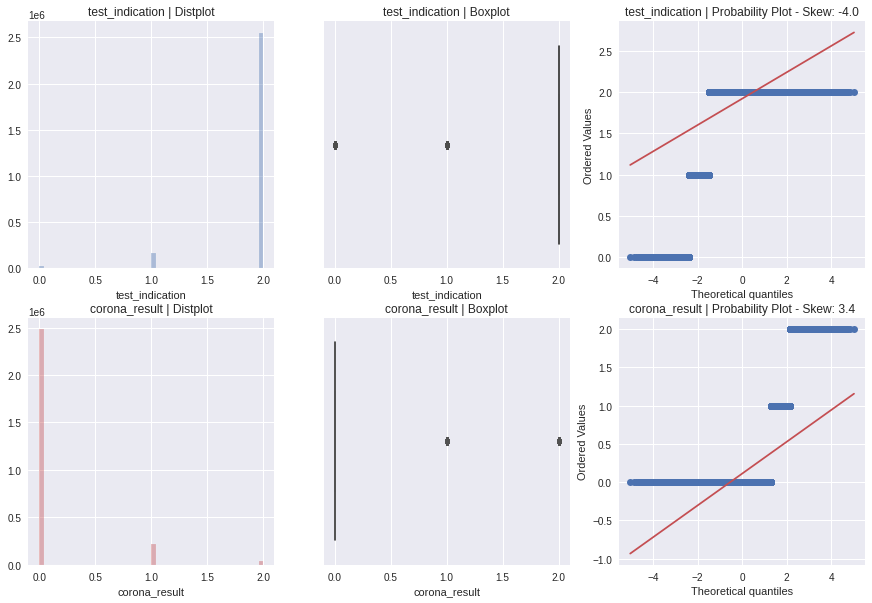

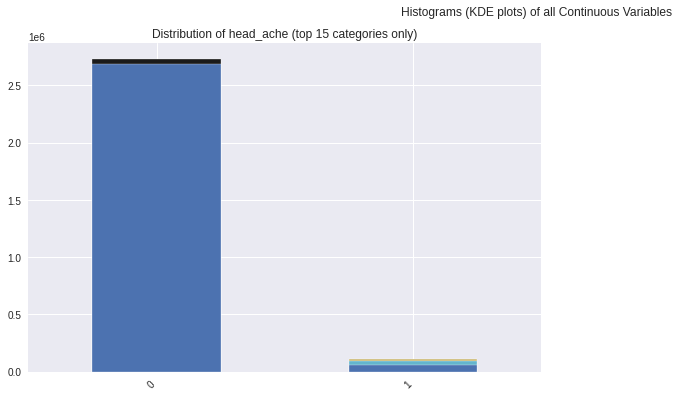

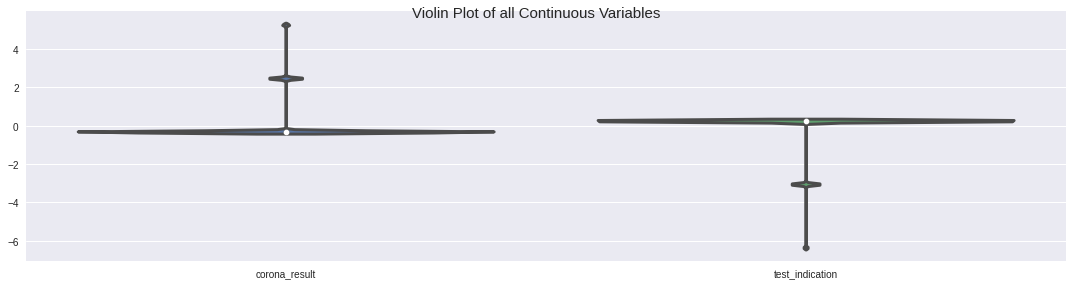

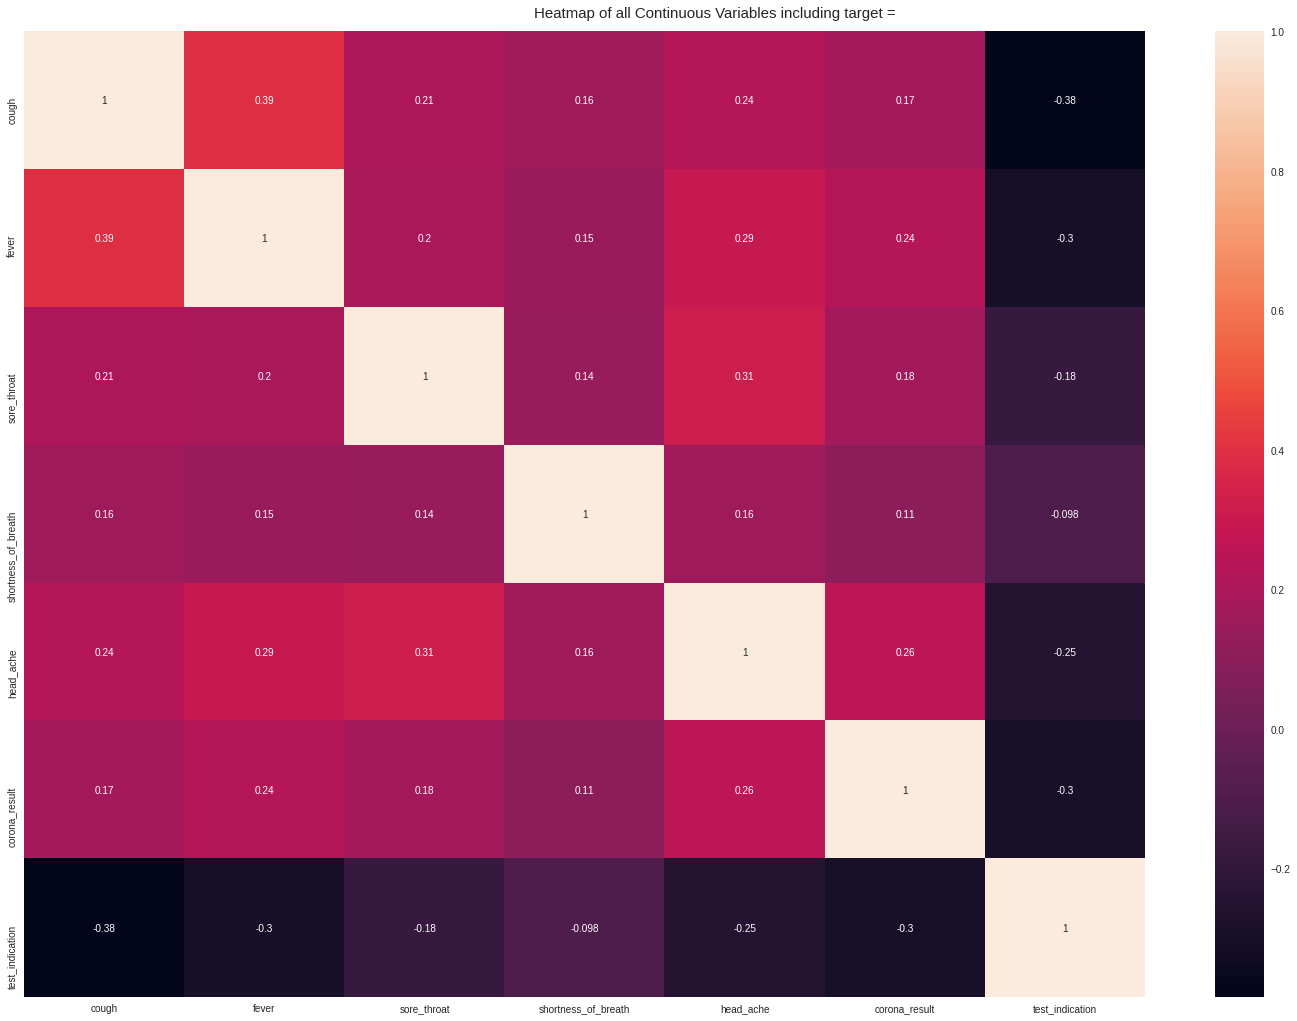

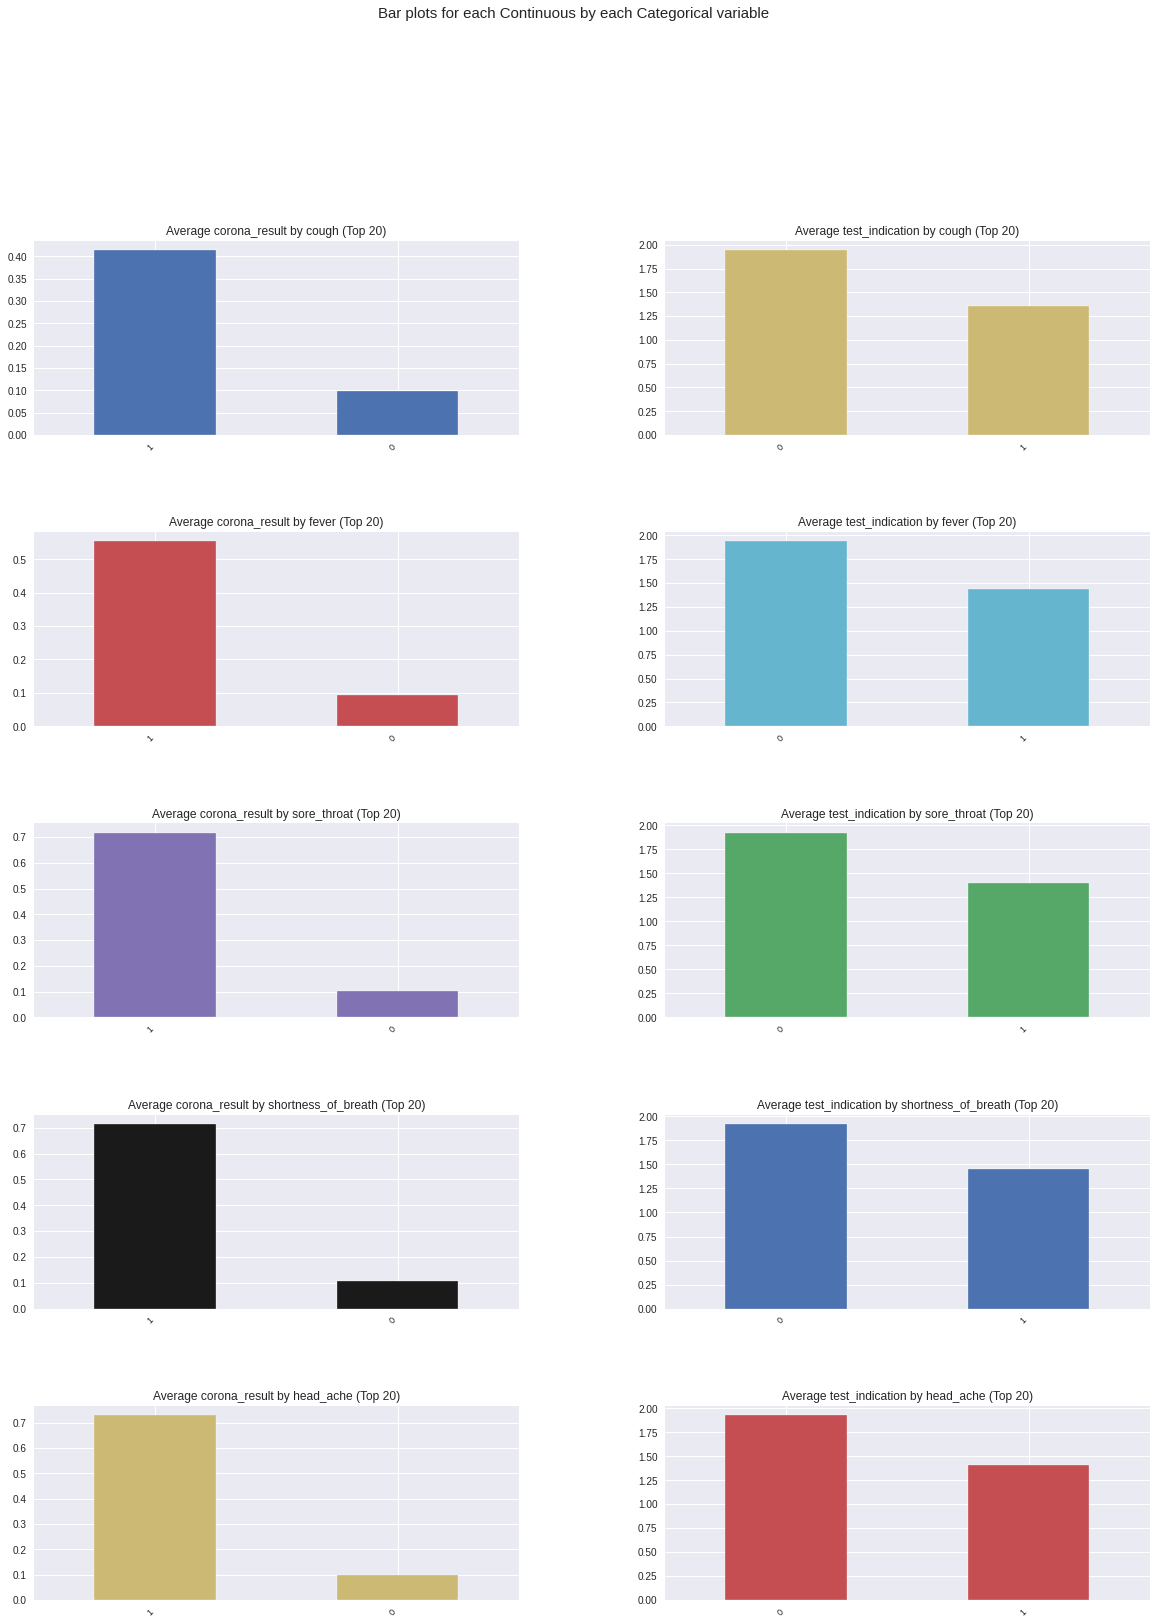

Time to run AutoViz (in seconds) = 31.722

 ###################### VISUALIZATION Completed ########################


In [33]:
filename = "/content/data.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=15000000,
    max_cols_analyzed=30,
)

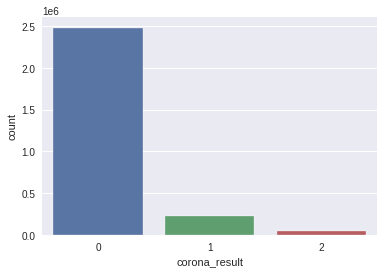

In [34]:
sns.countplot(x='corona_result',data= df_train)

# creating model


# RANDOM FOREST

In [35]:
x = df_train.drop('corona_result',axis=1)
y = df_train['corona_result']

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919817 entries, 1970971 to 305711
Data columns (total 6 columns):
 #   Column               Dtype
---  ------               -----
 0   cough                int64
 1   fever                int64
 2   sore_throat          int64
 3   shortness_of_breath  int64
 4   head_ache            int64
 5   test_indication      int64
dtypes: int64(6)
memory usage: 102.5 MB


In [38]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822779 entries, 484719 to 454086
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   cough                822779 non-null  int64
 1   fever                822779 non-null  int64
 2   sore_throat          822779 non-null  int64
 3   shortness_of_breath  822779 non-null  int64
 4   head_ache            822779 non-null  int64
 5   test_indication      822779 non-null  int64
dtypes: int64(6)
memory usage: 43.9 MB


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(n_estimators=500,criterion='gini')

In [66]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
prediction = model.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [69]:
cm = confusion_matrix(y_test,prediction)
cm

array([[720437,  23467,      0],
       [ 29161,  37296,      0],
       [ 10916,   1502,      0]])

In [70]:
accuracy_score(y_test,prediction)

0.9209435340474174

In [72]:
f1_score(y_test,prediction,average='micro')

0.9209435340474174

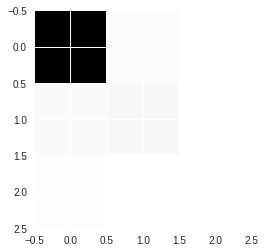

In [62]:
plt.imshow(cm)

In [74]:
x_train.head(1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication
1970971,0,0,0,0,0,2


# creating custom input

In [90]:
def covid_test():
  cough = input('Are you suffering from cough ')
  if cough == 'Yes':
    cough = 1
  else:
    cough = 0

  fever = input('Are you suffering from fever ')
  if fever == 'Yes':
    fever = 1
  else:
    fever = 0

  sore_throat = input('Are you suffering from Sore throat ')
  if sore_throat == 'Yes':
    sore_throat = 1
  else:
    sore_throat = 0

  shortness_of_breath = input('Are you suffering from Shortness of Breath ')
  if shortness_of_breath == 'Yes':
    shortness_of_breath = 1
  else:
    shortness_of_breath = 0

  head_ache = input('Are you suffering from Head ache ')
  if head_ache == 'Yes':
    head_ache = 1
  else:
    head_ache = 0

  test_indication = input("Are you in contact with any person ")
  if test_indication == "Abroad":
    test_indication = 0
  elif test_indication == "Contact with confirmed":
    test_indication = 1
  else:
    test_indication = 2

    
  prediction = model.predict([[cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication]])
  
  if prediction.all() == 0:
    print("You are mostly corona negative")
  elif prediction.all() == 1:
    print("You are mostly corona postivie")
  else:
    print("You are not suffering from covid it might be fever")

  
covid_test()
  

Are you suffering from cough Yes
Are you suffering from fever Yes
Are you suffering from Sore throat Yes
Are you suffering from Shortness of Breath Yes
Are you suffering from Head ache Yes
Are you in contact with any person Abroad
You are mostly corona postivie


In [91]:
import pickle
filename = 'Eyantra.pickle'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9209435340474174
